# ML Clustering and Classification
#### *This dataset is part of the RNA-Seq , it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. This dataset has 20K datapoints with `gene` data which is used to determine the `type of tumor`*


## Dataset Loading and Minor Data transformations

In [1]:
import pandas as pd

pd.set_option('max_columns', 5)
pd.set_option('display.width', None)
pd.set_option('precision', 2)

tumor=pd.read_csv('Tumor_pattern_data.csv')
tumor.head()

,Unnamed: 0,gene_0,...,gene_20529,gene_20530
0,sample_0,0.0,...,5.29,0.0
1,sample_1,0.0,...,2.09,0.0
2,sample_2,0.0,...,1.68,0.0
3,sample_3,0.0,...,3.29,0.0
4,sample_4,0.0,...,5.11,0.0


In [2]:
#Rename first column with sampleno
tumor.rename(columns = {'Unnamed: 0':'Sample_No'},inplace=True)
tumor.head()

,Sample_No,gene_0,...,gene_20529,gene_20530
0,sample_0,0.0,...,5.29,0.0
1,sample_1,0.0,...,2.09,0.0
2,sample_2,0.0,...,1.68,0.0
3,sample_3,0.0,...,3.29,0.0
4,sample_4,0.0,...,5.11,0.0


#### Import labels into another dataframe. This is a labeled dataset with labels in another csv file

In [3]:
labels=pd.read_csv('labels.csv')

labels.rename(columns = {'Unnamed: 0':'Sample_No'},inplace=True)
labels.head()

,Sample_No,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


#### Merge two datasets to create a labeled dataset

In [4]:
tumor_data = pd.concat([tumor,labels], axis=1, join='inner')

tumor_data.rename(columns = {'Class':'Tumor_Class'},inplace=True)
tumor_data.head()

,Sample_No,gene_0,...,Sample_No,Tumor_Class
0,sample_0,0.0,...,sample_0,PRAD
1,sample_1,0.0,...,sample_1,LUAD
2,sample_2,0.0,...,sample_2,PRAD
3,sample_3,0.0,...,sample_3,PRAD
4,sample_4,0.0,...,sample_4,BRCA


In [5]:
print(f'tumor data shape    = {tumor_data.shape}')

print(f'Label Values  = {tumor_data.Tumor_Class.unique()}')


tumor data shape    = (801, 20534)
Label Values  = ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


# Unsupervised ML

## Visualize the dataset

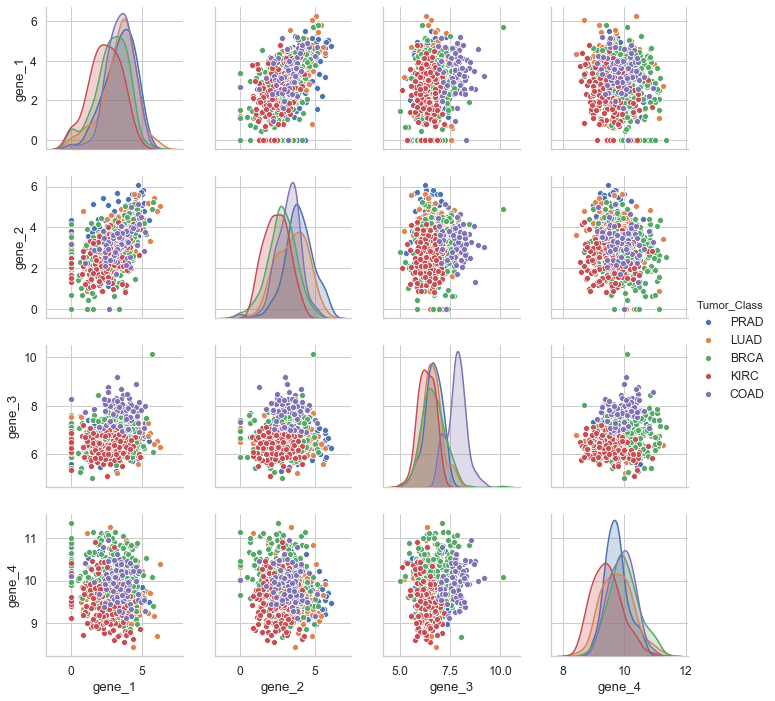

In [6]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=tumor_data, vars=tumor_data.columns[2:6], hue='Tumor_Class')

#### Since we have selected labeled dataset , we will ignore labels for first experiment i.e k means clustering

## Dimensionality reduction with Principal Component Analysis (PCA)

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

tumor_data_df=tumor_data.iloc[:,1:-2]
tumor_data_df.head()

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(tumor_data_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
reduced_tumor = pca.transform(tumor_data_df)
reduced_tumor.shape

(801, 2)

### Visualize the reduced data

In [9]:
reduced_tumor_df = pd.DataFrame(reduced_tumor, 
                               columns=['Component 1', 'Component 2'])
reduced_tumor_df['Tumor_Class'] = tumor_data.Tumor_Class

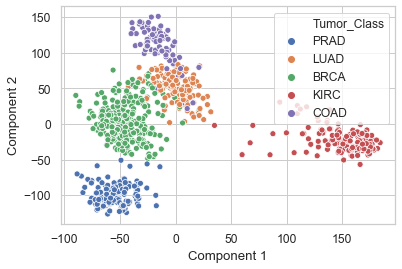

In [10]:
import matplotlib.pyplot as plt


axes = sns.scatterplot(data=reduced_tumor_df,hue='Tumor_Class', legend='brief', 
                       x='Component 1', y='Component 2') 


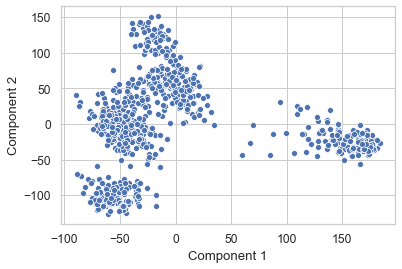

In [11]:
axes = sns.scatterplot(data=reduced_tumor_df, legend='brief', 
                       x='Component 1', y='Component 2')

## Create a TSNE Estimator to reduce the data to two dimensions

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
reduced_tumor_tsne = tsne.fit_transform(tumor_data_df)

print(f'Reduced data shape: reduced_digits.shape = {reduced_tumor_tsne.shape}')

Reduced data shape: reduced_digits.shape = (801, 2)


### Visualize reduced data with TSNE estimator

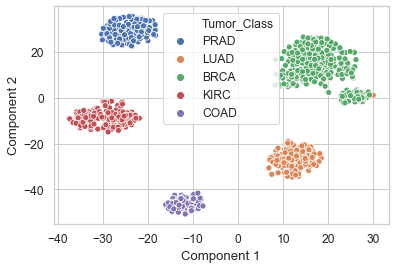

In [13]:
reduced_tumor_tsne_df = pd.DataFrame(reduced_tumor_tsne, 
                               columns=['Component 1', 'Component 2'])
reduced_tumor_tsne_df['Tumor_Class'] = tumor_data.Tumor_Class

axes = sns.scatterplot(data=reduced_tumor_tsne_df,hue='Tumor_Class', legend='brief', 
                       x='Component 1', y='Component 2') 

### Visualize reduced data without colors

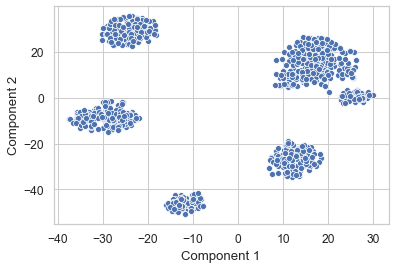

In [14]:
axes = sns.scatterplot(data=reduced_tumor_tsne_df, legend='brief', 
                       x='Component 1', y='Component 2') 

**After performing reductions using both TSNE and PCA estimators, we can see TSNE produces better well separated clusters. In TSNE graph we can see there are clearly 5 clusters compared to 3 clusters in PCA reduced data.**


# Other Experiments
### We performed 2 further experiments while doing Unsupervised machine learning i.e Inertia check and silhouette Score check for suitable cluster evaluation using various python functions.

## Inertia check to decide the suitable number of clusters

#### Inertia is Sum of squared distances of samples to their closest cluster center

>The objective of the KMeans++ initialization is that chosen centroids should be far from one another. The first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point’s closest existing cluster center.

In [15]:
# fitting multiple k-means algorithms and storing the values of inertia in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(tumor_data.iloc[:,1:-2])
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

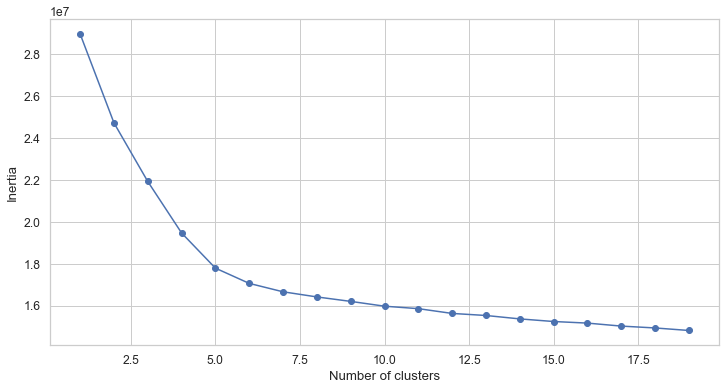

In [16]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### The value of inertia decreases as the number of clusters increase. So, its a trade-off here. Rule of thumb: The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.
Hence, from above graph k=5 is the optimal choice

## Cluster evaluation: the silhouette score

Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.

In [17]:
from sklearn.metrics import silhouette_score

# fitting multiple k-means algorithms and storing the values of inertia in an empty list
SC = []
for cluster in range(2,6):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(tumor_data.iloc[:,1:-2])
    sc=silhouette_score(tumor_data.iloc[:,1:-2], kmeans.labels_)
    SC.append(sc)
    

Text(0, 0.5, 'Silhouette Score')

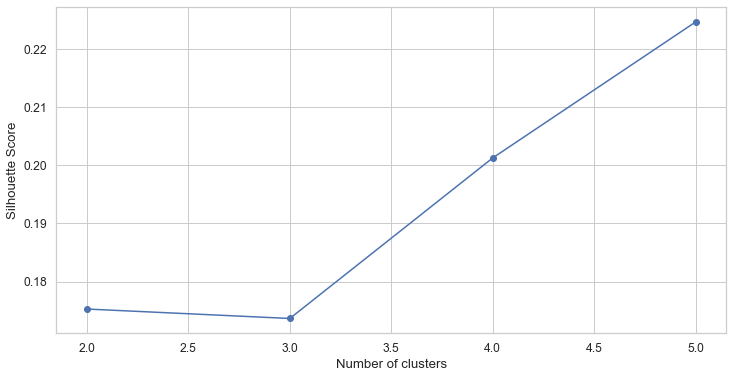

In [18]:
# converting the results into a dataframe and plotting them
frame_SC = pd.DataFrame({'Cluster':range(2,6), 'SC':SC})
plt.figure(figsize=(12,6))
plt.plot(frame_SC['Cluster'], frame_SC['SC'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

### We performed total 4 experiments on Unsupervised Data :
1. PCA - In this experiment we reduced data to 2 components and visualized the reduced data.We could see there was some overlap with 3 distinct clusters in graph.
2. TSNE - In this experiment we reduced data to 2 components and visualized the reduced data.We could see 5 distinct clusters in graph.
3. Inertia Check - Here we did kmeans clustering for k=1-20 and plotted inertia against the number of clusters. In graph we cpuld see elbow or change in direction happened at k=5.
4. Silhouette score - Here we got highest value at k=5. Select the value of K for which silhouette score is the highest.
>**Three of the above expermients confirmed that optimal number of clusters in data is 5.We already know that there are 5 labels in actual data. Hence experiments predicted correct number of clusters.**

Now we will do Kmeans clustering with k=5 and evaluate the results

## KMeans Clustering
### Create a k-means estimator and fit the model

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=11)  # find 5 clusters
kmeans.fit(tumor_data.iloc[:,1:-2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [20]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print()
print(labels)

[[0.04686506 2.39455662 2.44209827 ... 9.43000135 5.12209056 0.12948832]
 [0.02654385 3.44104073 3.97126223 ... 9.69678011 5.8496973  0.03572931]
 [0.0112492  2.83789693 2.80865405 ... 9.78282522 6.16212345 0.07479046]
 [0.04108822 3.36261095 3.45810486 ... 9.36890568 5.33356107 0.19574729]
 [0.02279657 3.45441244 3.24426629 ... 9.35325943 3.5612111  0.03325514]]

[1 3 1 1 2 1 0 1 2 1 2 0 1 2 2 2 3 0 0 1 2 0 3 2 0 3 4 2 2 2 2 2 0 2 1 2 0
 3 2 2 0 1 1 0 0 2 1 4 2 3 2 3 2 1 4 2 2 4 0 2 3 2 2 3 1 4 2 1 0 2 0 2 2 3
 2 3 2 0 1 4 2 1 2 2 1 1 2 2 0 2 1 1 2 2 2 1 4 2 1 2 2 0 2 0 3 0 3 4 3 3 1
 2 3 1 2 0 0 0 2 2 3 0 3 2 1 1 1 2 0 2 4 2 4 2 2 0 3 2 0 4 2 1 2 0 3 4 1 2
 3 3 3 3 2 2 3 2 2 1 1 3 1 3 0 2 1 3 4 0 3 2 0 3 2 3 2 2 2 1 2 0 4 0 2 1 1
 1 3 3 2 3 3 0 3 1 3 2 2 2 3 3 2 0 0 0 0 1 2 1 2 3 3 2 1 2 1 2 2 2 3 2 0 3
 0 0 3 2 0 1 2 3 3 1 4 2 0 1 0 4 2 0 0 3 1 1 3 3 0 2 2 4 2 1 3 2 1 0 1 1 1
 2 4 4 3 4 4 1 3 2 2 0 0 2 4 1 0 1 2 2 0 2 2 2 2 3 3 2 2 2 0 0 0 0 2 2 2 0
 2 2 3 1 2 2 4 3 1 2 2 2 4 2 1 2 

In [21]:
pred = kmeans.predict(tumor_data.iloc[:,1:-2])

In [22]:
frame = pd.DataFrame(tumor_data.iloc[:,1:-2])
frame['cluster'] = pred
frame['cluster'].value_counts() # Check the counts in each cluster

2    303
0    145
3    141
1    136
4     76
Name: cluster, dtype: int64

#### Visualize the centres created after Kmeans clustering

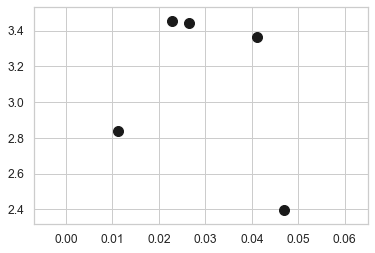

In [23]:
import matplotlib.pyplot as plt

dots = plt.scatter(centroids[:,0], centroids[:,1], s=100, c='k')

#### Create labeled data from the clusters created in Kmean Clustering

In [24]:
tumor_data['label']=labels

In [25]:
tumor_data.head(5)

,Sample_No,gene_0,...,Tumor_Class,label
0,sample_0,0.0,...,PRAD,1
1,sample_1,0.0,...,LUAD,3
2,sample_2,0.0,...,PRAD,1
3,sample_3,0.0,...,PRAD,1
4,sample_4,0.0,...,BRCA,2


In [26]:
tumor_data.Tumor_Class.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [27]:
tumor_data.label.unique()

array([1, 3, 2, 0, 4], dtype=int64)

### Compare labels created with already labeled data

In [28]:
labeled_tumor_data=tumor_data
Xdf=labeled_tumor_data.iloc[:,-2:]
for cl in tumor_data.Tumor_Class.unique():
    Ydf=Xdf.loc[Xdf['Tumor_Class'] == cl]
    print(cl )
    print(list(Ydf['label']))
    print()

PRAD
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

LUAD
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

BRCA
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### In the above result we can see that there are only few errors.We can see only few errors in LUAD,KIRC and COAD(1) tumor classes.
Hence we can conclude that KMeans Clusteirng is working fine on the given dataset.

#### Final dataset for K-NearestNeighbors

In [29]:
labeled_tumor_data.head()

,Sample_No,gene_0,...,Tumor_Class,label
0,sample_0,0.0,...,PRAD,1
1,sample_1,0.0,...,LUAD,3
2,sample_2,0.0,...,PRAD,1
3,sample_3,0.0,...,PRAD,1
4,sample_4,0.0,...,BRCA,2


# Supervised ML

### Explore the data and target values from newly labeled dataset

In [30]:
X=labeled_tumor_data.iloc[:,1:-3]
X.head()

,gene_0,gene_1,...,gene_20529,gene_20530
0,0.0,2.02,...,5.29,0.0
1,0.0,0.59,...,2.09,0.0
2,0.0,3.51,...,1.68,0.0
3,0.0,3.66,...,3.29,0.0
4,0.0,2.66,...,5.11,0.0


In [31]:
Y=labeled_tumor_data.iloc[:,-1]
print()
print(f'Some target values[::100] = {Y[::100]}')


Some target values[::100] = 0      1
100    2
200    2
300    2
400    4
500    2
600    1
700    0
800    1
Name: label, dtype: int32


In [32]:
print(f'tumor_data_label.data.shape    = {X.shape}')
print(f'tumor_data_label.target.shape  = {Y.shape}')

tumor_data_label.data.shape    = (801, 20531)
tumor_data_label.target.shape  = (801,)


### Split the data for training and testing

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, Y, random_state=11)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')


X_train.shape = (600, 20531)
X_test.shape  = (201, 20531)

y_train.shape = (600,)
y_test.shape  = (201,)


### Experiments to determine k Value:

###  Comparing Error Rate with the K Value

>Here we will calculate the mean-error for the predicted values of test set where K ranges between 1 and 10 and the result is appended to the error list.This will help you to find the best value of K for any dataset.The goal is to plot the graph of K value and the corresponding error rate for the dataset.

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) # store error value

Text(0, 0.5, 'Mean Error')

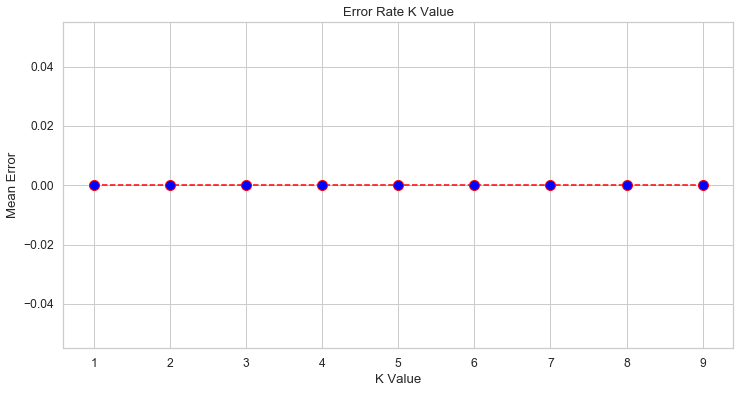

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**From the above graph, we can see that the mean error is zero for all the values of 'K'. Hence, we are not able to conclude the k value based on mean error value for this model**

### Compare the rmse values against k values
> We will calculate the Root Mean Square Error (RMSE) which is the standard deviation of the residuals (prediction errors) and plot it against K values

In [36]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.0
RMSE value for k=  5 is: 0.0
RMSE value for k=  6 is: 0.01175576026430996
RMSE value for k=  7 is: 0.010076365940837113
RMSE value for k=  8 is: 0.008816820198232479
RMSE value for k=  9 is: 0.017524452718791994
RMSE value for k=  10 is: 0.017277368511627207


Text(0, 0.5, 'RMSE value')

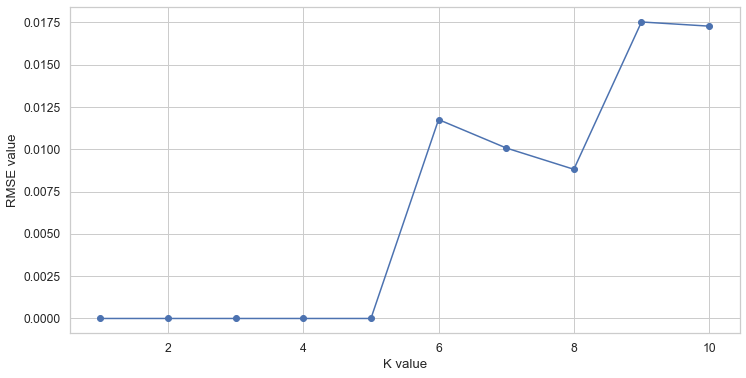

In [38]:
#plotting the rmse values against k values
frame = pd.DataFrame({'k': range(1,11),'RMSE':rmse_val})
plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['RMSE'], marker='o')
plt.xlabel('K value')
plt.ylabel('RMSE value')

###  Implementing GridsearchCV 
>Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. For deciding the value of k, plotting the elbow curve every time can be a cumbersome and tedious process. You can simply use gridsearch to find the best value


In [39]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

### Experiment Results:
1. Mean Error - Based on this experiment, we are not able to conclude the best 'K' value for our dataset.
2. RSME - Here we calculate rsme value for k=1 to 10 using knn model and plotted rsme score against the k values. From the elbow graph we can see that after k=5, the curve shoots up with further increase in the k value.Hence, it is safe to consider 'K' value as '5'.
4. GridsearchCV - Here the experiment estimates the optimal 'k value' for the model should be '5' based on training data.

Now we will implement KNN algorithm with k=5 and evaluate the results

### Create and train the k-nearest neighbors model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Test the model by predicting tumor labels

In [41]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty five predictions:')
print(f'predicted[:25] = {predicted[:25]}')
print(f' expected[:25] = {list(expected[:25])}')

First twenty five predictions:
predicted[:25] = [2 3 3 2 0 0 1 2 4 3 1 1 0 1 0 0 2 0 2 3 3 0 4 0 2]
 expected[:25] = [2, 3, 3, 2, 0, 0, 1, 2, 4, 3, 1, 1, 0, 1, 0, 0, 2, 0, 2, 3, 3, 0, 4, 0, 2]


**Here we can see the predicted and expected labels are matching for the first 25 results. Similarly, we will check for any discrepancies on the whole test data.**

### Predictions Vs Expected

In [42]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, list(expected)) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[]


**There is no discrepancy between the labels and the model predicted accurately.**

### Model prediction accuracy

In [43]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 100.00%


### Confusion matrix on test data

In [44]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[44  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 63  0  0]
 [ 0  0  0 46  0]
 [ 0  0  0  0 17]]


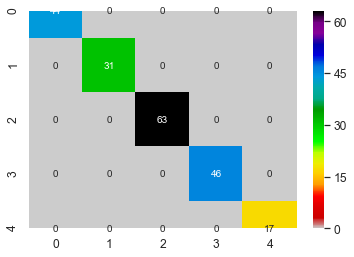

In [45]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(5), columns=range(5))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification report on test data

In [46]:
from sklearn.metrics import classification_report

names = [str(tumor) for tumor in Y.unique()]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        63
           0       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        17

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



**The results shows that KNN algorithm was able to classify all the 201 records in the test set with good precision, recall and f1 score.**

**We will now rerun the predictions on the full dataset X**

In [47]:
predicted_hat = knn.predict(X)  

### Compare the predictions with the original labels

In [48]:
tdf2=labeled_tumor_data.iloc[:,-2:]
tdf2['clasf_label']=predicted_hat
for cl in tumor_data.Tumor_Class.unique():
    Ydf2=tdf2.loc[tdf2['Tumor_Class'] == cl]
    print("Actual Class:",cl )
    print("Classification Labels:")
    print(list(Ydf2['clasf_label']))
    print()

Actual Class: PRAD
Classification Labels:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Actual Class: LUAD
Classification Labels:
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Actual Class: BRCA
Classification Labels:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### From the above results we can see that labels created after classification for each tumor class are same with couple of minor exception in LUAD class

# Summary
## Unsupervised ML
* We started with labeled dataset and discarded labels to perform Unsupervised ML.
* Perfomed TSNE and PCA reduction.
* We performed Unsupervised ML and created cluster of data and labeled tha dataset with these clusters.

## Supervised ML
* We used newly labeled dataset for Supervised ML.
* Split ,test and train dataset.
* Created Confusion matrix and confusion report.
 
## Further Experiments:
* We perfomed extra experiments both in supervised and unsupervised ML. In Unsupervised ML we did inertia check and Silhouette score check for determining optimal number of clusters for kmeans clustering.
* In Supervised ML we did extra mean error check,gridsearch and RSME to conclude the k value for knearest neigbhor algorithm.
